In [35]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Binarization

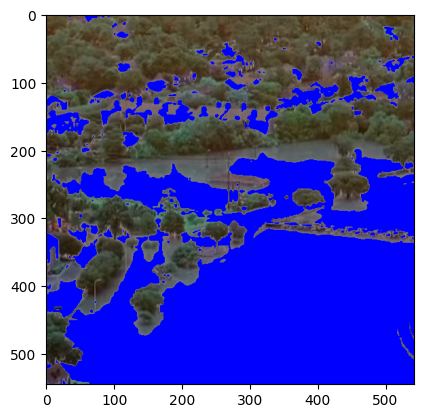

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, segmentation
from scipy import ndimage

# Load the image
img = io.imread('image.jpg')

# Convert to grayscale
gray = np.mean(img, axis=2)

# Apply a smoothing filter
smooth = filters.gaussian(gray, sigma=1)

# Apply Otsu thresholding
# separate the image to foreground and other things
thresh = filters.threshold_otsu(smooth)
binary = smooth > thresh

# Fill holes in binary image
# filled = ndimage.binary_fill_holes(binary)

# Apply watershed algorithm
distance = ndimage.distance_transform_edt(binary)
local_max = morphology.local_maxima(distance, indices=False, footprint=np.ones((3,3)))
markers = measure.label(local_max)
labels = segmentation.watershed(-distance, markers, mask=binary)

# Extract shape features of each region
props = measure.regionprops(labels)

# Assign a color to each region based on the color of its pixels
colors = img.copy()
for prop in props:
    color = np.array([0, 0, 255]) # set color to blue
    colors[labels == prop.label] = color

# Display the colored regions
fig, ax = plt.subplots()
ax.imshow(colors)
plt.show()

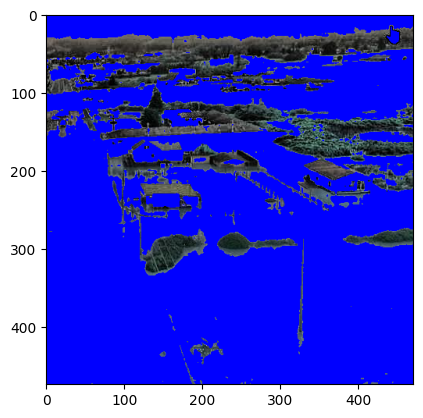

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, measure, segmentation
from scipy import ndimage

# Load the image
img = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/84.jpg')

# Convert to grayscale
gray = np.mean(img, axis=2)

# Apply a smoothing filter
smooth = filters.gaussian(gray, sigma=1)

# Apply Otsu thresholding
# separate the image to foreground and other things
thresh = filters.threshold_otsu(smooth)
binary = smooth > thresh

# Fill holes in binary image
# filled = ndimage.binary_fill_holes(binary)

# Apply watershed algorithm
distance = ndimage.distance_transform_edt(binary)
local_max = morphology.local_maxima(distance, indices=False, footprint=np.ones((3,3)))
markers = measure.label(local_max)
labels = segmentation.watershed(-distance, markers, mask=binary)

# Extract shape features of each region
props = measure.regionprops(labels)

# Assign a color to each region based on the color of its pixels
colors = img.copy()
for prop in props:
    color = np.array([0, 0, 255]) # set color to blue
    colors[labels == prop.label] = color

# Display the colored regions
fig, ax = plt.subplots()
ax.imshow(colors)
plt.show()

Clustering - kmeans : 3 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The number of bands of the image is:  3
The name of labels is:  [1 1 1 ... 1 1 1]


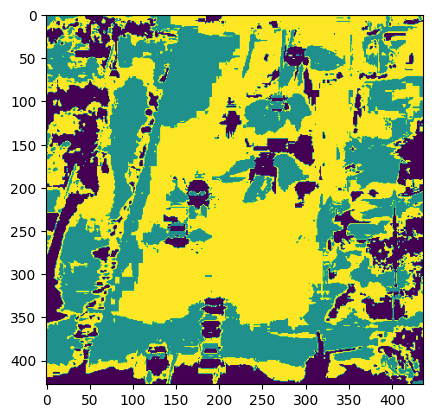

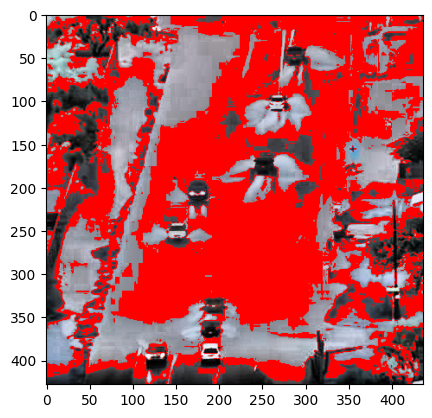

True

In [53]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/92.jpg')

# Flatten the image into a 2D array of pixels
pixel_values = image.reshape((-1, 3))

# Perform K-Means clustering with k=3 (you can adjust this value)
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixel_values)

# Reshape the cluster labels into the original image shape
segmented_image = kmeans.labels_.reshape(image.shape[:2])

# print number of bands of the image
print('The number of bands of the image is: ', image.shape[2])

# print name of labels 
print('The name of labels is: ', kmeans.labels_)
# Display the segmented image
# segmented_image[segmented_image == 0] = 255
# segmented_image[segmented_image == 1] = 0
# segmented_image[segmented_image == 2] = 0

plt.imshow(segmented_image)
plt.show()

# use the segmented_image as a mask to extract the flooded area from the original image
# make the flooded area to be blue color and leave the rest as it is 

flooded_img = image.copy()

flooded_img[segmented_image == 2] = (255,0,0)

plt.imshow(flooded_img)
plt.show()

cv2.imwrite('flooded_img.jpg', flooded_img)

use a thresholding technique that separates the image into foreground (water and bodies) and background (shadow) regions before applying K-Means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The name of labels is:  [1 1 1 ... 1 1 1]


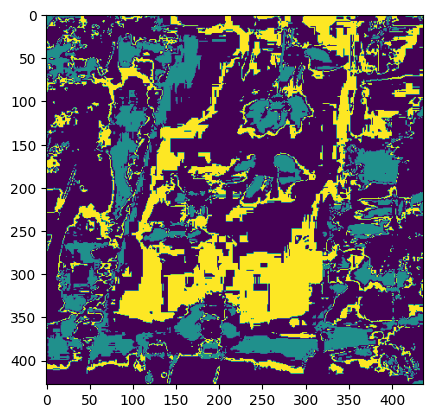

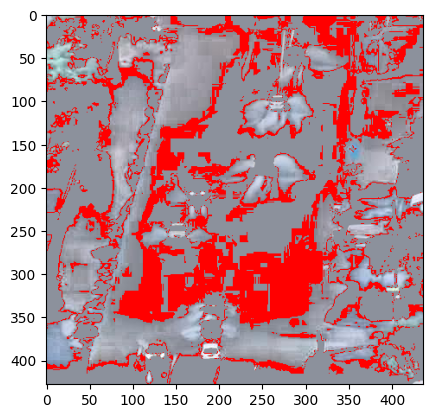

In [50]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/92.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the image into foreground and background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Flatten the image into a 2D array of pixels
pixel_values = image.reshape((-1, 3))

# Create a mask for the foreground pixels
mask = np.zeros(thresh.shape[:2], dtype=np.uint8)
mask[thresh == 255] = 1

# Create a flattened version of the mask
flat_mask = mask.reshape(-1)

# Set the pixel values of the background regions to the same value as the water
pixel_values[flat_mask == 0] = pixel_values[flat_mask == 1].mean(axis=0)

# Perform K-Means clustering with k=3 (you can adjust this value)
kmeans = KMeans(n_clusters=3, random_state=0).fit(pixel_values)

# Reshape the cluster labels into the original image shape
segmented_image = kmeans.labels_.reshape(image.shape[:2])

print('The name of labels is: ', kmeans.labels_)

# Display the segmented image
plt.imshow(segmented_image)
plt.show()

# # Convert the segmented image to a binary mask
# mask = np.uint8(segmented_image == 1)

# # Find the contours of the holes in the mask
# contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Calculate the mean size of the contours
# total_size = 0
# for contour in contours:
#     total_size += cv2.contourArea(contour)
# inpaint_radius = int(total_size / len(contours))

# # Convert the segmented image to an 8-bit single-channel image
# segmented_image = cv2.convertScaleAbs(segmented_image)

# # Set the inpainting radius based on the size of the holes
# inpaint_image = cv2.inpaint(segmented_image, mask, inpaintRadius=inpaint_radius, flags=cv2.INPAINT_TELEA)

# plt.imshow(inpaint_image)
# plt.show()

flooded_img = image.copy()

flooded_img[segmented_image == 2] = (255,0,0)

plt.imshow(flooded_img)
plt.show()

K-means : 2 clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


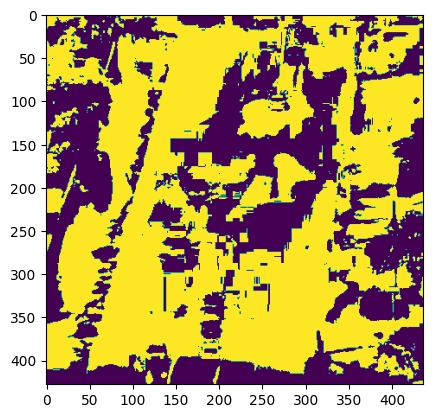

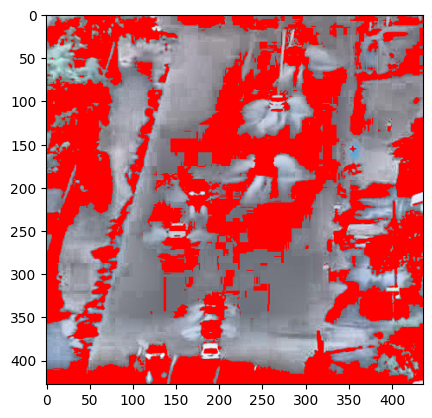

In [49]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the image
image = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/92.jpg')

# Flatten the image into a 2D array of pixels
pixel_values = image.reshape((-1, 3))

# Perform K-Means clustering with k=3 (you can adjust this value)
kmeans = KMeans(n_clusters=2).fit(pixel_values)

# Reshape the cluster labels into the original image shape
segmented_image = kmeans.labels_.reshape(image.shape[:2])
# cv2.imwrite('segmented_image_knn2.jpg', segmented_image)

# Display the segmented image
plt.imshow(segmented_image)
plt.show()

flooded_img = image.copy()

flooded_img[segmented_image == 0] = (255,0,0)

plt.imshow(flooded_img)
plt.show()
# cv2.imwrite('flooded_img_knn2.jpg', flooded_img)

region growing: image segmentation algorithm that groups together neighboring pixels with similar properties(color and texture) into regions.

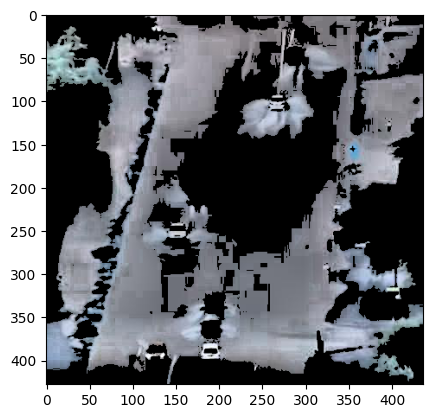

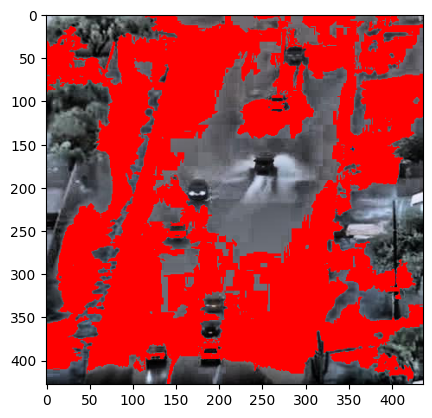

In [47]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from skimage import io

# Load the image
# image = cv2.imread('image.jpg')
image = io.imread('/content/drive/MyDrive/SI_flood_dataset/dataset/SI_flood_dataset_split/train_eq/flooded/92.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to segment the image into foreground and background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Perform connected component labeling to segment the image into regions
label_image = label(thresh)

# Find the properties of each region
regions = regionprops(label_image)

# Find the region with the largest area (assuming it's the flooded region)
flooded_region = max(regions, key=lambda x: x.area)

# Create a binary mask for the flooded region
mask = np.zeros_like(gray)
mask[label_image == flooded_region.label] = 255

# Apply the mask to the original image to obtain the segmented image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# cv2.imwrite('segmented_image_regionGrowing.jpg', segmented_image)

# Display the segmented image
plt.imshow(segmented_image)
plt.show()

flood_image = image.copy()
flood_image[mask == 255] = (255,0,0)

# cv2.imwrite('flooded_img_regionGrowing.jpg', flood_image)

# Display the flooded image
plt.imshow(flood_image)
plt.show()